In [9]:
# import tensorflow and keras (tf.keras)
import tensorflow as tf
from tensorflow import keras

#from keras.preprocessing import image
import matplotlib.pyplot as plt

import numpy as np
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [10]:
# Loading the data (cat/non-cat)
# train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

# Loading the data (cat/non-cat)
train_dataset = h5py.File('./train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

test_dataset = h5py.File('./test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels
    
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

In [11]:
train_set_x_orig.shape # train set features
train_set_y_orig.shape # train set labels

test_set_x_orig.shape # test set features
test_set_y_orig.shape # test set labels

    
train_set_y.shape
test_set_y.shape

(1, 50)

In [12]:
train_set_x_orig.shape # train set features

(209, 64, 64, 3)

In [13]:
# setup model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64,64,3)),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [14]:
# compile model
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# train model

model.fit(train_set_x_orig, train_set_y_orig, epochs=10)

Epoch 1/10
209/209 [==============================] - 1s 7ms/sample - loss: 10.5655 - acc: 0.3445
Epoch 2/10
209/209 [==============================] - 0s 506us/sample - loss: 10.5655 - acc: 0.3445
Epoch 3/10
209/209 [==============================] - 0s 539us/sample - loss: 10.5655 - acc: 0.3445
Epoch 4/10
209/209 [==============================] - 0s 544us/sample - loss: 10.5655 - acc: 0.3445
Epoch 5/10
209/209 [==============================] - 0s 501us/sample - loss: 10.5655 - acc: 0.3445
Epoch 6/10
209/209 [==============================] - 0s 525us/sample - loss: 10.5655 - acc: 0.3445
Epoch 7/10
209/209 [==============================] - 0s 544us/sample - loss: 10.5655 - acc: 0.3445
Epoch 8/10
209/209 [==============================] - 0s 539us/sample - loss: 10.5655 - acc: 0.3445
Epoch 9/10
209/209 [==============================] - 0s 449us/sample - loss: 10.5655 - acc: 0.3445
Epoch 10/10
209/209 [==============================] - 0s 482us/sample - loss: 10.5654 - acc: 0.3445


In [16]:
# evaluate
test_loss, test_acc = model.evaluate(test_set_x_orig, test_set_y_orig)
print('test accuracy: ', test_acc)

50/50 [==============================] - 0s 2ms/sample - loss: 5.4802 - acc: 0.6600
test accuracy:  0.66


In [17]:
# make predictions
predictions = model.predict(test_set_x_orig)

prediction:  [0. 1.]


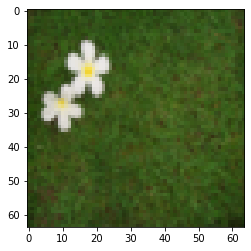

In [18]:
i = 6
plt.imshow(train_set_x_orig[i])
print('prediction: ', predictions[i])

prediction:  [0. 1.]

prediction:  1


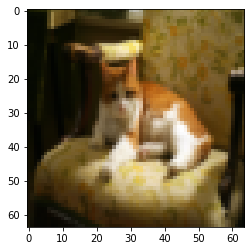

In [11]:
i = 7
plt.imshow(train_set_x_orig[i])
print('prediction: ', predictions[i])
print('\nprediction: ', np.argmax(predictions[i]))

prediction:  [0. 1.]


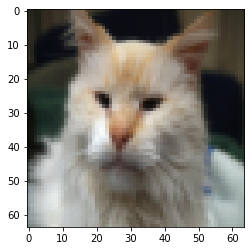

In [12]:
i = 27
plt.imshow(train_set_x_orig[i])
print('prediction: ', predictions[i])

prediction:  [0. 1.]


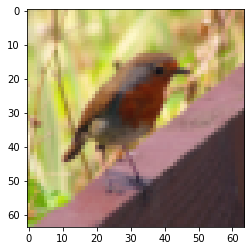

In [13]:
i = 10
plt.imshow(train_set_x_orig[i])
print('prediction: ', predictions[i])

prediction:  [0. 1.]


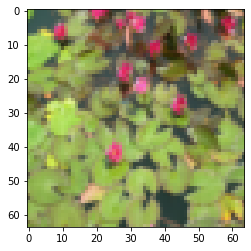

In [14]:
i = 18
plt.imshow(train_set_x_orig[i])
print('prediction: ', predictions[i])